In [6]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import postprocess as pp
# import plots
import os

postproc


In [7]:
def plot_operator_spectrum(data):
    figure, axis = plt.subplots(1, 1)
    scale = data['eigs-ball'].values[0][0]
    colour = np.where(data['eigs-cone'] > 0, 'C1', 'C2')
    colour = np.where(data['eigs-cone'] > 0, 'C1', 'C2')
    # Concatenate data for all load steps
    load_steps_all = np.concatenate([np.full_like(eigenvalues, load_step) for load_step, eigenvalues in zip(data['load'], data['eigs-ball'])])
    eigenvalues_all = np.concatenate(data['eigs-ball'])

    # Create a scatter plot with vertical alignment
    axis.scatter(load_steps_all, eigenvalues_all / scale, marker='o', c='C0', label='Eigenvalues in vector space')
    axis.scatter(data.load, data['eigs-cone'], marker = 'd', c=colour, s=60, label='Eigenvalues in cone')

    axis.set_xlabel('Load Step')
    axis.set_ylabel('Eigenvalues')
    axis.set_title('Spectrum of Nonlinear Operator $H_{\\ell}:=E_\\ell\'\'(y_t)$')
    axis.set_yticks([0, 1, -3])
    axis.axhline(0., c='k')
    axis.set_ylim(-.5, 1.5)
    axis.grid(True)
    axis.legend()
    
    return figure, axis
    # axis.show()

def find_closest_index(physical_time, time_data):
    # Extract the time values from the array
    discrete_times = time_data[:, 0]

    # Find the index of the closest discrete time
    closest_index = np.argmin(np.abs(discrete_times - physical_time))

    # Return the corresponding index value
    return time_data[closest_index, 1]

# def read_mode_data_from_npz(npz_file, time_step, num_points = -1, num_modes=1):
#     """
#     Read mode data for a given timestep and x_values from an npz file.

#     Parameters:
#     - npz_file (numpy.lib.npyio.NpzFile): The npz file containing mode shapes data.
#     - time_step (int): The timestep to read.
#     - num_modes (int): The number of modes.
#     - num_points (int): The number of domain nodes.

#     Returns:
#     - mode_data (dict): A dictionary containing mode-specific fields for the given timestep.
#     """
#     mode_data = {}
#     mode_data["x_values"] = npz_file["point_values"].item()["x_values"]
#     if 'time_steps' not in npz_file or time_step not in npz_file['time_steps']:
#         print(f"No data available for timestep {time_step}.")
#         return None

#     index = np.where(npz_file['time_steps'] == time_step)[0][0]

#     for mode in range(1, num_modes + 1):
#         mode_key = f'mode_{mode}'

#         # print(f"{mode_key not in npz_file['point_values']}")
        
#         if mode_key not in npz_file['point_values'].item():
#             print(f"No data available for mode {mode} at timestep {time_step}.")
#             continue

#         fields = npz_file['point_values'].item()[mode_key]
#         if 'bifurcation' not in fields or 'stability' not in fields:
#             print(f"Incomplete data for mode {mode} at timestep {time_step}.")
#             continue
        

#         field_1_values = np.array(fields['bifurcation'][index])
#         field_2_values = np.array(fields['stability'][index])

#         # Assuming x_values is known or can be obtained
#         if num_points == -1:
#             num_points = len(npz_file["point_values"].item()["x_values"])
#         x_values = np.linspace(0, 1, num_points)  # Replace with actual x_values
        
#         mode_data["fields"] = {
#             'bifurcation': {'x_values': x_values, 'values': field_1_values},
#             'stability': {'x_values': x_values, 'values': field_2_values},
#         }
#         mode_data["time_step"] = time_step
#         mode_data["lambda_bifurcation"] = np.nan
#         mode_data["lambda_stability"] = np.nan
        
#         # print(mode_data[mode_key])
#     return mode_data

# def plot_fields_for_time_step(mode_shapes_data):
#     x_values = mode_shapes_data["x_values"]
#     fields = mode_shapes_data["fields"]
#     if 'bifurcation' in fields and 'stability' in fields:
#         bifurcation_values = np.array(fields['bifurcation']['values'])
#         stability_values = np.array(fields['stability']['values'])

#         fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#         axes[0].plot(x_values, bifurcation_values, label='Bifurcation Mode')
#         axes[0].set_title(f'Bifurcation')

#         axes[1].plot(x_values, stability_values, label='Stability Mode')
#         axes[1].set_title(f'Stability')

#         for axis in axes:
#             axis.axhline(0., c='k')
        
#         return fig, axes




# Investigating the fundamental traction


We study fundamental problem of a one-dimensional variational evolution,
which features non-trivial stability properties
such as:
    -
    -
    -

The problem is as follows:

Find $y_t$ such that:

GS)
$$
E(y_t)\leq E(z), \quad \forall z \in A(y_t)
$$

LS) 
$\exists \bar h: $
$$
E(y_t)\leq E(y_t + z), \quad \forall z \in .., ||z||\leq h
$$


In [3]:
experiment = '../../test/output/one-dimensional-bar/MPI-1/50/55045ae161aef937cdd5e62625e01cd3'
params, data, signature = pp.load_data(experiment)


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': "Spectrum of Nonlinear Operator $H_{\\ell}:=E_\\ell''(y_t)$"}, xlabel='Load Step', ylabel='Eigenvalues'>)

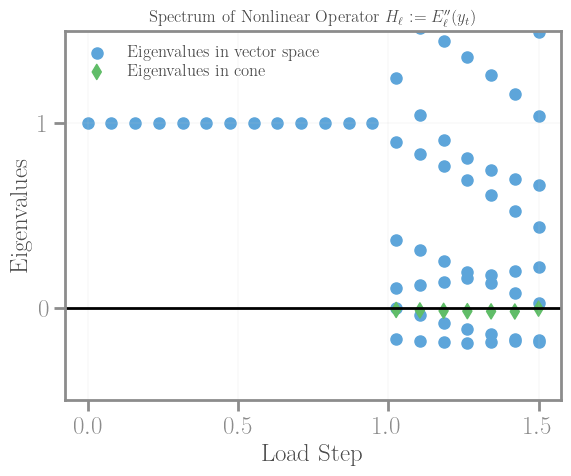

In [4]:
plot_operator_spectrum(data)

## Check the Profiles

In [5]:
data['load'][13]

1.026315789473684

In [6]:
modes_data = np.load(os.path.join(experiment, 'mode_shapes_data.npz'), allow_pickle=True)


In [7]:
modes_data["time_steps"]

array([1.02631579, 1.10526316, 1.18421053, 1.26315789, 1.34210526,
       1.42105263, 1.5       ])

In [8]:
mode = read_mode_data_from_npz(modes_data, time_step=data['load'][13], num_modes=1, num_points=10)
_fig, _axes = plot_fields_for_time_step(mode)

NameError: name 'read_mode_data_from_npz' is not defined

## Analytical treatment

In [3]:
class DefaultDamage:
    def __init__(self, state, matpar, name = "Default damage model", slug = "atk"):
        self.state = state
        self.matpar = matpar
        self.str = name
        self.slug = slug

    def _a(self, α):
        _α = self.state[α]
        # _α = α
        # _E0 = self.matpar[E0]
        _k = self.matpar["k"]

        return (1 - α) / ((_k-1) * α + 1)

    def _w(self, _α):
        # _α = α
        # _w1 = self.matpar["w1"]

        return self.matpar["w1"] * _α

    def energy(self, state):
        """Total energy"""
        return self._elastic(state) + self._damage(state) - self.work(state)

    def work(self, state):
        return 0

    def _elastic(self, state):
        _E0 = self.matpar["E0"]
        _u = state[u]
        _α = state[α]

        return 1./2. * _E0 * self._a(_α) * sp.diff(_u, x)**2 

    def _damage(self, state):
        _α = state[α]
        matpar = self.matpar
        _w1 = matpar["w1"]
        _η = matpar["η"]

        return _w1 * (self._w(_α) + matpar["η"]**2 * (sp.diff(_α, x))**2 )

    def __str__(self):
     return self.str

class DamageATn(DefaultDamage):
    """docstring for Model"""
    def __init__(self, state, matpar, slug, name = "ATn Damage Model"):
        super(DamageATn, self).__init__(state, matpar, name = name, slug = slug)

    def _a(self, α):
        return (1 - α)**2

    def _w(self, _α):
        _α = α
        _n = self.matpar["n"]
        return _α**_n

class ModelAnalysis:
    """Helper class to analyse stability properties of a model"""

    def __init__(self, model):
        self.model = model
        self.state = model.state
        _state = self.state
        self.matpar = model.matpar

        self._s = 1/self.model._a(_state[α])
        self._sp = sp.diff(self._s, _state[α], 1)
        self._spp = sp.diff(self._s, _state[α], 2)

        self._a = self.model._a(_state[α])
        self._ap = sp.diff(self._a, _state[α], 1)
        self._app = sp.diff(self._a, _state[α], 2)

        self._w = self.model._w(_state[α])
        self._wp = sp.diff(self._w, _state[α])
        self._wpp = sp.diff(self._w, _state[α], 2)
        
        _symbols = ["x", "t", "L"]

        # Create a dictionary of symbols
        self.symbols = {name: sp.Symbol(name) for name in _symbols}

        # self.criterion()

    def criterion(self):
        """Damage onset"""
        model, state = self.model, self.state

        _u0 = t*x/L
        _alpha0 = 0

        _crit = sp.diff(model.energy(state), α) \
            .subs({u: _u0, α: _alpha0})         \
            .simplify()

        self.crit = _crit

        return _crit
    
    def _homogeneous_alpha(self, matpar = None):
        t, x, L = self.symbols["t"], self.symbols["x"], self.matpar["L"]
        _u0 = t*x/L
        state = self.state
        
        if matpar is not None:
            _matpar = matpar
        else:
            _matpar = self.matpar

        try:
            _eq = sp.diff(self.model.energy(state), α) \
                .subs({u: _u0, α: α})         \
                .simplify()

            _ah = sp.solve(_eq, α)

        # except NotImplementedError as e:
        except:
            _eq = sp.diff(self.model.energy(state), α)   \
                .subs({u: _u0, α: α})                   \
                .subs(_matpar)                   \
                .simplify()

            _ah = sp.solve(_eq, α)

        return _ah
    
    def plot_homogeneous_alpha(self, matpar={}):
        ah = self._homogeneous_alpha()
        t = self.symbols["t"]
        _tc = self.critical_load_N(matpar)

        fig, axis = plt.subplots(1, 1, figsize=(8, 6))

        # Plot the zero range
        subcritical_times = np.linspace(0., _tc)
        axis.plot(subcritical_times, [0 for t in subcritical_times], c="C0", lw=2)

        supercritical_times = np.linspace(_tc, 3)

        for _a in ah:
            _af = sp.lambdify(t, _a.subs(matpar), "numpy")

            axis.plot(supercritical_times, [_af(t)
                      for t in supercritical_times], c="C0")

        axis.set_xlim(0, 3)
        axis.set_ylim(-.1, 1)

        axis.axvline(_tc, c='k')
        axis.axhline(1, c='k', ls='--')
        
        axis.set_yticks([0, 1])
        axis.set_xticks([0, _tc], [0, "$t_c$"])
        
        axis.spines['top'].set_visible(False)
        axis.spines['right'].set_visible(False)
        # axis.spines['bottom'].set_visible(False)
        axis.spines['left'].set_visible(False)
        axis.set_xlabel('$t$')
        axis.set_ylabel('$\\alpha$')

        axis.spines['bottom'].set_color('k')
        # axis.spines['top'].set_color('k')
        axis.xaxis.label.set_color('k')
        axis.tick_params(axis='x', colors='k')

        return fig, axis

    def plot_homogeneous_stress(self, matpar={}, ah=None, elements = 30):

        if ah is None:
            ah = self._homogeneous_alpha()

        # _tc = self.critical_load_N(_matpar)
        try:
            _tc = self.critical_load_N(matpar)
        except:
            _tc = self._critical_load

        fig, axis = plt.subplots(1, 1, figsize=(8, 6))

        # Plot the zero range
        times = np.linspace(0, 3, elements)

        _sf = sp.lambdify(t, self._stress(ah=ah, matpar = matpar).subs(_matpar), "numpy")

        # axis.plot(np.linspace(0, 3), [_sf(t) for t in times], c="C0")
        axis.plot(times, [_sf(t) for t in times], c="C0")

        plt.axvline(_tc, c='k')
        plt.axhline(1, c='k')

        axis.set_xlim(0, 3)
        axis.set_ylim(-.1, 1)

        axis.axvline(_tc, c='k')
        axis.axhline(1, c='k', ls='--')
        
        axis.set_yticks([0, 1])
        axis.set_xticks([0, _tc], [0, "$t_c$"])
        
        axis.spines['top'].set_visible(False)
        axis.spines['right'].set_visible(False)
        # axis.spines['bottom'].set_visible(False)
        axis.spines['left'].set_visible(False)
        axis.set_xlabel('$t$')
        axis.set_ylabel('$\\sigma$')

        axis.spines['bottom'].set_color('k')
        # axis.spines['top'].set_color('k')
        axis.xaxis.label.set_color('k')
        axis.tick_params(axis='x', colors='k')

        return fig, axis


    def _stress(self, ah=None, matpar={}):
        t, x, L = self.symbols["t"], self.symbols["x"], self.matpar["L"]
        _u0 = t*x/L

        if ah is None:
            return
        _ah = ah

        _tc = self.critical_load_N(matpar)
        
        stress_alpha = sp.Piecewise(
            (sp.sqrt(2 * self._wp / self._sp).subs({α: _ah}), t >= _tc),
            (sp.diff(_u0, x).subs(matpar), t < _tc))

        # return sp.sqrt( 2* self._wp / self._sp).subs({α: _ah})
        return stress_alpha

    def critical_load(self, matpar = {}):
        t = self.symbols["t"]
        
        ans = sp.solve(self.crit, t)
        _ = [t.subs(matpar) for t in ans]
        # print(ans)
        # print(np.array(_))
        positive = np.where(np.array(_) >= 0)[0][0]
        # pdx
        self._critical_load = ans[positive]
        return ans[positive]

    def critical_load_N(self, _matpar={}):
        return np.float64(self._critical_load.subs(_matpar))



In [10]:

E0, L, w1, η, σc = sp.symbols('E0 L w1 η σ_c')
x, t = sp.symbols('x t')
α = sp.Function('α')(x)
u = sp.Function('u')(x)

n = sp.symbols('n')

state = {u: u, α: α}



In [11]:
matpar = {"n": 1, "E0": E0, "w1": w1, "η": η, "L": L}
_matpar = {"n": 1, "E0": 1, "w1": 1, "η": .1, "L": 1}

at1 = DamageATn(state, matpar=matpar,
                name="At1 Damage Model",
                slug=f"at1")

ana = ModelAnalysis(at1)

ana.criterion()
at1.energy(state)

0.5*E0*(1 - α(x))**2*Derivative(u(x), x)**2 + w1*(η**2*Derivative(α(x), x)**2 + α(x))

In [12]:
ana.critical_load(matpar=_matpar)

L*sqrt(w1/E0)

In [13]:
ana.criterion()
ana._homogeneous_alpha()


[1 - L**2*w1/(E0*t**2)]

(<Figure size 800x600 with 1 Axes>, <Axes: xlabel='$t$', ylabel='$\\alpha$'>)

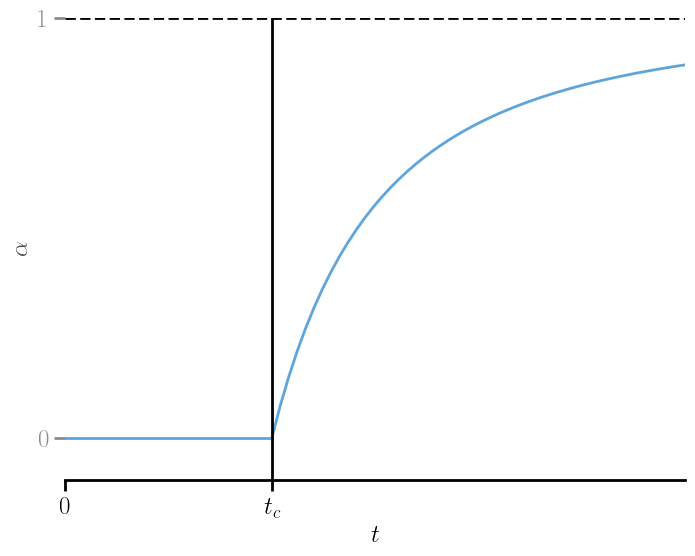

In [14]:
ana.plot_homogeneous_alpha(matpar = _matpar)

In [15]:
ana._stress(ana._homogeneous_alpha()[0], matpar=_matpar)

Piecewise((sqrt(L**6*w1**3/(E0**3*t**6)), t >= 1.0), (t, True))

<lambdifygenerated-2>:2: RuntimeWarning: divide by zero encountered in scalar power
  return select([greater_equal(t, 1.0),True], [sqrt(t**(-6.0)),t], default=nan)


(<Figure size 800x600 with 1 Axes>, <Axes: xlabel='$t$', ylabel='$\\sigma$'>)

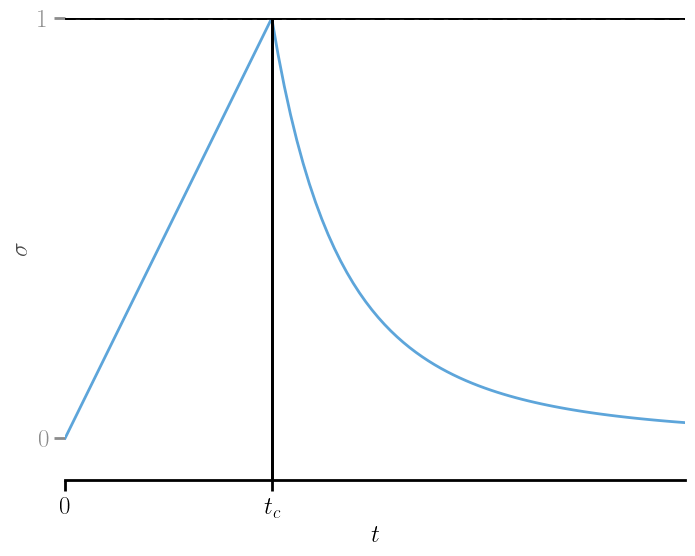

In [16]:
ana.plot_homogeneous_stress(matpar = _matpar, ah=ana._homogeneous_alpha()[0], elements=100)

In [17]:
_uh = t*x/L
_ah = ana._homogeneous_alpha()[0]

_stress = ana._stress(_ah, matpar=_matpar)

In [18]:
_B0 = (1/2*ana._spp * _stress**2 - ana._wpp).subs(_matpar).subs({α: _ah})
_A = (2 * _matpar["η"]**2 / _B0).subs(_matpar)
_B = (ana._a.subs({α: _ah}).simplify() / _B0).subs(_matpar)
_C = - (ana._ap/ana._a * ana.symbols["t"]).subs(_matpar).subs({α: _ah}).simplify().subs(_matpar)

In [19]:
_matpar

{'n': 1, 'E0': 1, 'w1': 1, 'η': 0.1, 'L': 1}

In [20]:
_Rloc = (sp.pi**2*_A)**(1/3)*(_B*_C**2)**(2/3)
_Rloc.subs({η: .1})
# _f = sp.lambdify(t, _Rloc, "numpy")
# [_f(t) for t in supercritical_times]


0.227996792890226*pi**0.666666666666667*(Piecewise((t**6, t >= 1.0), (t**(-2), True))/t**8)**0.333333333333333*(Piecewise((t**6, t >= 1.0), (t**(-2), True))/t**6)**0.666666666666667

In [21]:
_Rhomog = _B*_C**2
_f = sp.lambdify(t, _Rhomog, "numpy")
_f(_tc)


_B*_C**2

NameError: name '_tc' is not defined

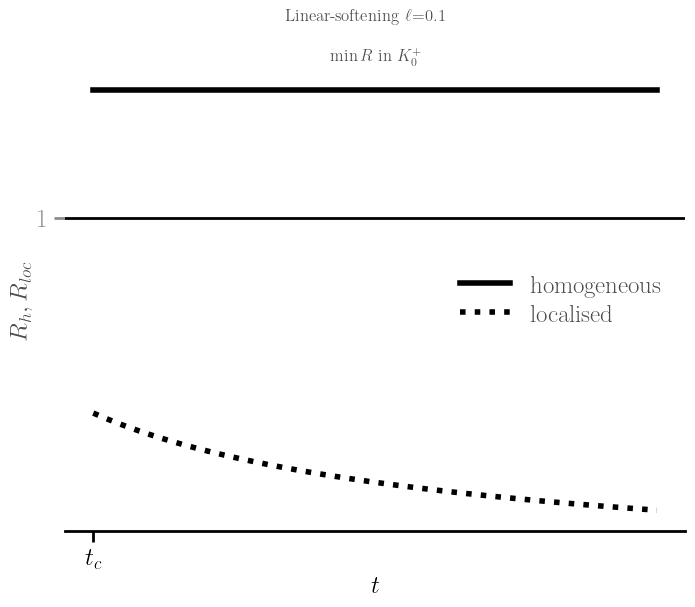

In [22]:
fig, axis = plt.subplots(1, 1, figsize=(8, 6))
_tc = np.float32(ana.critical_load(_matpar).subs(_matpar).evalf())

supercritical_times  = np.linspace(_tc, 3)
_Rhomog = _B*_C**2
_f = sp.lambdify(t, _Rhomog, "numpy")
axis.plot(supercritical_times, [_f(t)
            for t in supercritical_times], c="k", label="homogeneous", lw=4)

_Rloc = ((sp.pi**2*_A)**(1/3)*(_B*_C**2)**(2/3)).subs(_matpar)
_f = sp.lambdify(t, _Rloc, "numpy")
axis.plot(supercritical_times, [_f(t)
            for t in supercritical_times], c="k", ls=':' , label="localised", lw=4)

axis.legend( prop={'size': 18})
axis.axhline(1, c='k')
# plt.plot()
axis.set_title('$\min R$ in $K^+_0$')
# fig.suptitle(f"{ana.model} $\ell$={_matpar[𝓁]}")
fig.suptitle(f"Linear-softening $\ell$={_matpar['η']}")
axis.set_xlabel('$t$')
axis.set_ylabel('$R_{h}, R_{loc}$')
axis.set_yticks([1])
axis.set_xticks([_tc], ['$t_c$'])
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
# axis.spines['bottom'].set_visible(False)
axis.spines['left'].set_visible(False)

axis.spines['bottom'].set_color('k')
axis.spines['top'].set_color('k')
axis.xaxis.label.set_color('k')
axis.tick_params(axis='x', colors='k')

## Verification

We solve:
$$ \min R(z) \text{ in }V, K^+_0$$

In [23]:
parameters = book_of_the_numbers()
print(f"a: {parameters.get('a')}, b: {parameters.get('b')}, c: {parameters.get('c')}")


NameError: name 'book_of_the_numbers' is not defined

## In the Vector Space

In [24]:
np.min([b*c**2,np.pi**2*a])



NameError: name 'b' is not defined

In [11]:

x = sp.symbols('x', real=True)
v = sp.Function('v', real=True)(x)
β = sp.Function('β', real=True)(x)
C, A = sp.symbols('C, A', real=True)

def book_of_the_numbers():
    """This function, formerly called `fuck_dgsi`, invokes the book of the numbers
    to get three real quantities, according to the scriptures.
    
    @article{pham:2011-the-issues,
        author = {Pham, Kim and Marigo, Jean-Jacques and Maurini, Corrado},
        date-added = {2015-08-24 14:23:19 +0000},
        date-modified = {2022-08-10 11:03:49 +0200},
        journal = {Journal of the Mechanics and Physics of Solids},
        number = {6},
        pages = {1163--1190},
        publisher = {Elsevier},
        title = {The issues of the uniqueness and the stability of the homogeneous response in uniaxial tests with gradient damage models},
        volume = {59},
        year = {2011},
        }
        
    Fuck Elsevier.
    
"""
    while True:
        a = np.random.rand()
        b = np.random.rand()*3
        c = (np.random.choice([-1, 1], 1) * np.random.rand(1))[0]*3  # Generate three random numbers between 0 and 1

        # Check conditions
        if a > 0 and b > 0 and c != 0:
            break

    return {"a": a, "b": b, "c": c}

def solve_minimum(parameters):
    a = parameters["a"]
    b = parameters["b"]
    c = parameters["c"]
    _condition = b * c**2 < np.pi**2 * a 
    print(f"bc**2 = {np.around(b*c**2, 2)}, π**2 * a = {np.around(np.pi**2 * a, 2)}")
    
    if _condition:
        print('case 1')
        _subs = {A: 0}
    elif not _condition:
        print('case 2')
        _subs = {C: 0}

    return np.min([b*c**2,np.pi**2*a]), _subs

def solve_eigenspace_vector(parameters, idx = 0):
    x = sp.symbols('x', real=True)
    v = sp.Function('v', real=True)(x)
    β = sp.Function('β', real=True)(x)
    C, A = sp.symbols('C A')
    
    a = parameters["a"]
    b = parameters["b"]
    c = parameters["c"]    
    
    if b * c**2 < sp.pi**2 * a:
        print('case 1')
        _subs = {A: 0}
        A = 0
    elif b * c**2 > sp.pi**2 * a:
        print('case 2')
        _subs = {C: 0}
        C = 0
    
    
    β = C + A*sp.cos(sp.pi * x)
    v = c * A / sp.pi * sp.sin(sp.pi * x)

    depends_on_A = np.any([sp.symbols('A') in expression.free_symbols for expression in [v, β]])
    depends_on_C = np.any([sp.symbols('C') in expression.free_symbols for expression in [v, β]])
    
    _norm = sp.sqrt(np.sum([sp.integrate(eigenfunction**2, (x, 0, 1)) for eigenfunction in (v, β)]))

    print([expression.free_symbols for expression in [v, β]])
    print(_norm, depends_on_A, depends_on_C)
    
    if depends_on_A:
        print('depends_on_A')
        _normalise = [{sp.symbols('A'): ay} for ay in sp.solve(_norm - 1, A)]
    elif depends_on_C:
        print('depends_on_C')
        _normalise = [{sp.symbols('C'): cy} for cy in sp.solve(_norm - 1, C)]
        
    return {"v": v.subs(_normalise[idx]), "β": β.subs(_normalise[idx]), "D": 0}

    # return (v, β), _normalise

def solve_eigenspace_cone(parameters, idx = 0):
    x = sp.symbols('x', real=True)
    v = sp.Function('v', real=True)(x)
    β = sp.Function('β', real=True)(x)
    C, A = sp.symbols('C A')
    
    a = parameters["a"]
    b = parameters["b"]
    c = parameters["c"]    
    D = 0
    
    if b * c**2 < sp.pi**2 * a:
        print('case 1')
        β = C
        
    elif b * c**2 > sp.pi**2 * a:
        print('case 2')
        # D = sp.symbols('D')
        D = (sp.pi**2 * a / (b * c**2))**(1/3)
        β = sp.Piecewise(
            (C *(1 + sp.cos(sp.pi * x / D)), (0 <= x) & (x <= D)),
            (0, True)
            )
        
        _min = (np.pi**2 * a)**(1/3) * (b * c**2)**(2/3)
        
    elif b * c**2 == sp.pi**2 * a:
        print('case eq')
        _min = b * c**2
        _subs = {C: 0}
        C = 0
        β = C + A*sp.cos(sp.pi * x)
        # abs(A) < C
    
    depends_on_A = sp.symbols('A') in β.free_symbols
    depends_on_C = sp.symbols('C') in β.free_symbols
    depends_on_D = sp.symbols('D') in β.free_symbols
    
    _norm = sp.sqrt(sp.integrate(β**2, (x, 0, 1)))

    # print([expression.free_symbols for expression in [v, β]])
    print(_norm)
    
    if depends_on_A:
        print('depends_on_A')
        _normalise = [{sp.symbols('A'): ay} for ay in sp.solve(_norm - 1, A)]
    elif depends_on_C:
        print('depends_on_C')
        _normalise = [{sp.symbols('C'): cy} for cy in sp.solve(_norm - 1, C) if cy > 0]
    elif depends_on_D:
        print('depends_on_D')
    
    return {"v": 0, "β": β.subs(_normalise[idx]), "D": D}

def plot_eigenspace(eigenspace, normalisation):
    (v, β) = eigenspace

    v_normalised = v.subs(normalisation[0])
    β_normalised = β.subs(normalisation[0])


    v_func = sp.lambdify(x, v_normalised, 'numpy')
    β_func = sp.lambdify(x, β_normalised, 'numpy')

    x_values = np.linspace(0, 1, 100)


    fig, axis = plt.subplots(1, 2, figsize=(8, 6))

    # plt.plot(x_values, x_values, label='v(x)')
    axis[0].plot(x_values, [v_func(x) for x in x_values], label='v(x)')
    axis[0].set_title('Eigenfunction v(x)')
    axis[0].set_xlabel('$x$')
    axis[0].set_ylabel('$v(x)$')

    axis[1].plot(x_values, [β_func(x) for x in x_values], label='β(x)')
    axis[1].set_title('Eigenfunction $\\beta$(x)')
    axis[1].set_xlabel('$x$')
    axis[1].set_ylabel('$\\beta$(x)')

    fig.tight_layout()

    return fig, axis


In [26]:
# a, b, c = sp.symbols("a, b, c", real=True)

parameters = book_of_the_numbers()
print(parameters)
a = parameters["a"]
b = parameters["b"]
c = parameters["c"]
print(f"bc**2 = {np.around(b*c**2, 2)}, π**2 * a = {np.around(np.pi**2 * a, 2)}")

β = C + A * sp.cos(sp.pi * x)
v = c * A / sp.pi * sp.sin(sp.pi * x)

# Conditions for A and C
if b * c**2 < sp.pi**2 * a:
    print('case 1')
    _subs = {A: 0}
elif b * c**2 > sp.pi**2 * a:
    print('case 2')
    _subs = {C: 0}

print([x.subs(_subs) for x in (v, β)])

{'a': 0.44310035877249, 'b': 0.3765571402900324, 'c': -0.5642094337519761}
bc**2 = 0.12, π**2 * a = 4.37
case 1
[0, C]


In [32]:
parameters = book_of_the_numbers()

_min = solve_minimum(parameters)
eigenspace, normalisation = solve_eigenspace_vector(parameters)

print(f'Minimum of Fundamental Quotient {_min[0]}, Eigenspace {eigenspace}, Normalisation {normalisation}')

bc**2 = 4.62, π**2 * a = 6.48
case 1
case 1
[set(), {C}]
sqrt(C**2) False True
depends_on_C
Minimum of Fundamental Quotient 4.617223056635782, Eigenspace (0, C), Normalisation [{C: -1}, {C: 1}]


In [33]:
# sp.sqrt(sp.integrate(eigenfunction**2, (x, 0, 1)))
_norm = sp.sqrt(np.sum([sp.integrate(eigenfunction**2, (x, 0, 1)) for eigenfunction in (v, β)]))
A_solution = sp.solve(_norm - 1, A)
print(f"Solutions for A: {A_solution}")


Solutions for A: [-1.22606318412651*sqrt(0.999999999999998 - C**2), 1.22606318412651*sqrt(0.999999999999998 - C**2)]


bc**2 = 10.8, π**2 * a = 6.81
case 2
case 2
[{x, A}, {x, A}]
1.36966917852371*sqrt(A**2/pi**2 + 0.266525421185975*A**2) True False
depends_on_A
[{A: -1.20379058141872}, {A: 1.20379058141872}]


(<Figure size 800x600 with 2 Axes>,
 array([<Axes: title={'center': 'Eigenfunction v(x)'}, xlabel='$x$', ylabel='$v(x)$'>,
        <Axes: title={'center': 'Eigenfunction $\\beta$(x)'}, xlabel='$x$', ylabel='$\\beta$(x)'>],
       dtype=object))

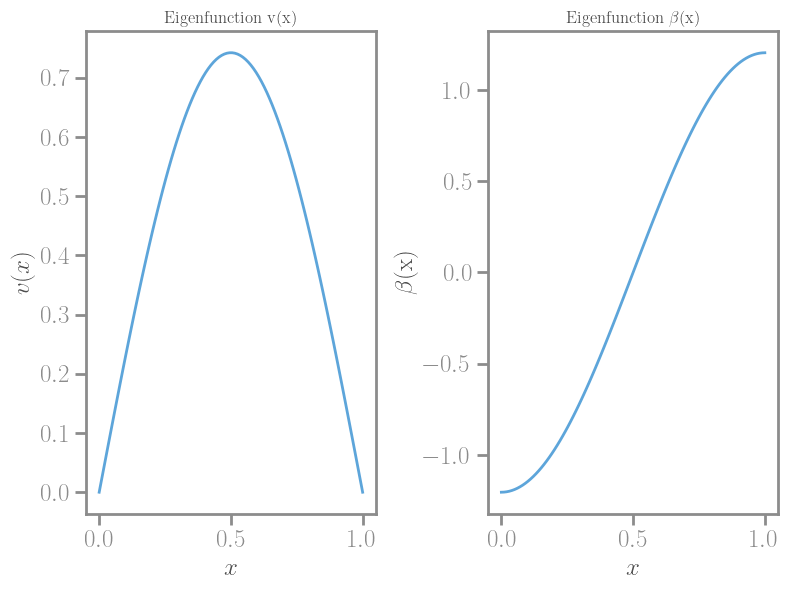

In [34]:
parameters = book_of_the_numbers()
_min = solve_minimum(parameters)
eigenspace, normalisation = solve_eigenspace_vector(parameters)
print(normalisation)
plot_eigenspace(eigenspace, normalisation)

In [47]:
parameters = book_of_the_numbers()

_eigenspace = solve_eigenspace_cone(parameters)
# β.subs(normalisation[0])
# β, normalisation
_eigenspace

case 2
sqrt(0.14391876229156*sin(1.0*pi**1.0)*cos(1.0*pi**1.0)/pi**0.333333333333333 + 0.14391876229156*pi**0.666666666666667*sin(1.0*pi**1.0)**2 + 0.575675049166239*sin(1.0*pi**1.0)/pi**0.333333333333333 + 0.14391876229156*pi**0.666666666666667*cos(1.0*pi**1.0)**2 + 0.28783752458312*pi**0.666666666666667)*sqrt(C**2)
depends_on_C


{'v': 0,
 'β': Piecewise((1.03911602081047*cos(3.47418218471799*pi**0.333333333333333*x) + 1.03911602081047, (x >= 0) & (x <= 0.28783752458312*pi**0.666666666666667)), (0, True)),
 'D': 0.28783752458312*pi**0.666666666666667}

In [29]:
# sp.evalf(D)
type(sp.N(D))
# np.around(sp.N(D), 2)
np.around(float(sp.N(D)), 2)

TypeError: Cannot convert expression to float

case 2
sqrt(0.16173002226466*sin(1.0*pi**1.0)*cos(1.0*pi**1.0)/pi**0.333333333333333 + 0.16173002226466*pi**0.666666666666667*sin(1.0*pi**1.0)**2 + 0.646920089058641*sin(1.0*pi**1.0)/pi**0.333333333333333 + 0.16173002226466*pi**0.666666666666667*cos(1.0*pi**1.0)**2 + 0.323460044529321*pi**0.666666666666667)*sqrt(C**2)
depends_on_C


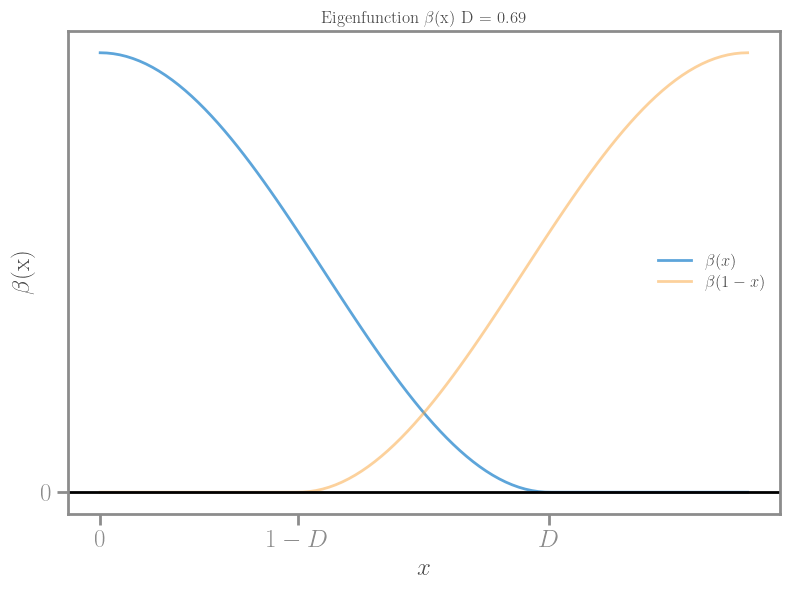

In [51]:
parameters = book_of_the_numbers()
_eigenspace = solve_eigenspace_cone(parameters)

β, D = _eigenspace["β"], _eigenspace["D"]

# β_normalised = β.subs(normalisation[0])

β_func = sp.lambdify(x, β, 'numpy')

x_values = np.linspace(0, 1, 100)

fig, axis = plt.subplots(1, 1, figsize=(8, 6))

axis.plot(x_values, [β_func(x) for x in x_values], label='$\\beta(x)$')
axis.plot(x_values, [β_func(1-x) for x in x_values], label='$\\beta(1-x)$', alpha = .5)
axis.set_title(f'Eigenfunction $\\beta$(x) D = {np.around(float(sp.N(D)), 2)}')
axis.set_xlabel('$x$')
axis.axhline(0, c='k')
axis.set_ylabel('$\\beta$(x)')
axis.set_xticks([0, float(sp.N(D)), float(1-sp.N(D))], [0, "$D$", "$1-D$"])
axis.set_yticks([0], [0])

axis.legend()
fig.tight_layout()

In [915]:
eigenspace = solve_eigenspace_cone(parameters)
v, β = eigenspace["v"], eigenspace["β"]
D = eigenspace["D"]

x_values = np.linspace(0, 1, 100)
v_function = sp.lambdify('x', v)
β_function = sp.lambdify('x', β)

v_values = [v_function(x) for x in x_values]
β_values = [β_function(x) for x in x_values]

case 2
sqrt(0.0341556015634623*sin(1.0*pi**1.0)*cos(1.0*pi**1.0)/pi**0.333333333333333 + 0.0341556015634623*pi**0.666666666666667*sin(1.0*pi**1.0)**2 + 0.136622406253849*sin(1.0*pi**1.0)/pi**0.333333333333333 + 0.0341556015634623*pi**0.666666666666667*cos(1.0*pi**1.0)**2 + 0.0683112031269245*pi**0.666666666666667)*sqrt(C**2)
depends_on_C


### Vs the Crunch

In [6]:
!ls '../../test/output/rayleigh-benchmark/MPI-1/'

1886c43ceb7f7b33293e7718baadb80f a34f942db5e46624e9ea3eefa3e0e85c
62a2522ac6885818c04a6a78eae11bfa e9276db499c49b725dbe8cb8ac8c9521


In [40]:
experiment = '../../test/output/rayleigh-benchmark/MPI-1/e9276db499c49b725dbe8cb8ac8c9521'
params, data, signature = pp.load_data(experiment)


File 'time_data.json' not found. Handle this case accordingly.
no sig file found


In [41]:
a = params['model']['a']
b = params['model']['b']
c = params['model']['c']

parameters = {"a": a, "b": b, "c": c}

parameters

{'a': 1, 'b': 1, 'c': 4}

case 2
[{A, x}, {A, x}]
sqrt(A**2/2 + 8*A**2/pi**2) True False
depends_on_A
case 2
sqrt(0.198425131496025*sin(1.0*pi**1.0)*cos(1.0*pi**1.0)/pi**0.333333333333333 + 0.198425131496025*pi**0.666666666666667*sin(1.0*pi**1.0)**2 + 0.7937005259841*sin(1.0*pi**1.0)/pi**0.333333333333333 + 0.198425131496025*pi**0.666666666666667*cos(1.0*pi**1.0)**2 + 0.39685026299205*pi**0.666666666666667)*sqrt(C**2)
depends_on_C


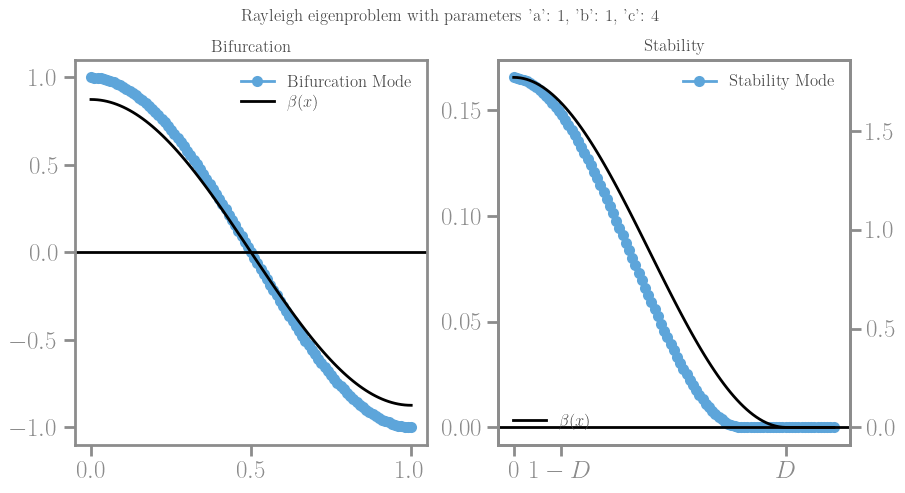

In [43]:
modes_data = np.load(os.path.join(experiment, 'mode_shapes_data.npz'), allow_pickle=True)
mode = pp.read_mode_data_from_npz(modes_data, time_step=0, num_modes=1, num_points=10)
_fig, _axes = pp.plot_fields_for_time_step(mode)
_fig.suptitle(f"Rayleigh eigenproblem with parameters {parameters}")
eigenspace_v = solve_eigenspace_vector(parameters, idx=1)

v, β = eigenspace_v["v"], eigenspace_v["β"]

x_values = np.linspace(0, 1, 100)
v_function = sp.lambdify('x', v)
β_function = sp.lambdify('x', β)
v_values = [v_function(x) for x in x_values]
β_values = [β_function(x) for x in x_values]

_axes[0].plot(x_values, β_values, label=r'$\beta(x)$', c='k')

eigenspace_k = solve_eigenspace_cone(parameters, idx=0)

v, β = eigenspace_k["v"], eigenspace_k["β"]
D = eigenspace_k["D"]
x_values = np.linspace(0, 1, 100)
v_function = sp.lambdify('x', v)
β_function = sp.lambdify('x', β)
v_values = [v_function(x) for x in x_values]
β_values = [β_function(x) for x in x_values]

__axes = _axes[1].twinx()
__axes.plot(x_values, β_values, label=r'$\beta(x)$', c='k')
__axes.set_xticks([0, float(sp.N(D)), float(1-sp.N(D))], [0, "$D$", "$1-D$"])

[_ax.legend() for _ax in _axes]
__axes.legend(loc='lower left')


In [46]:

experiment = '../../test/output/rayleigh-benchmark/MPI-1/35dc528686badfde6e535184026e2c38'
params, data, signature = pp.load_data(experiment)
a = params['model']['a']
b = params['model']['b']
c = params['model']['c']

parameters = {"a": a, "b": b, "c": c}



File 'time_data.json' not found. Handle this case accordingly.


case 2
[{A, x}, {A, x}]
sqrt(A**2/2 + 32*A**2/pi**2) True False
depends_on_A
case 2
sqrt(0.125*sin(1.0*pi**1.0)*cos(1.0*pi**1.0)/pi**0.333333333333333 + 0.125*pi**0.666666666666667*sin(1.0*pi**1.0)**2 + 0.5*sin(1.0*pi**1.0)/pi**0.333333333333333 + 0.125*pi**0.666666666666667*cos(1.0*pi**1.0)**2 + 0.25*pi**0.666666666666667)*sqrt(C**2)
depends_on_C


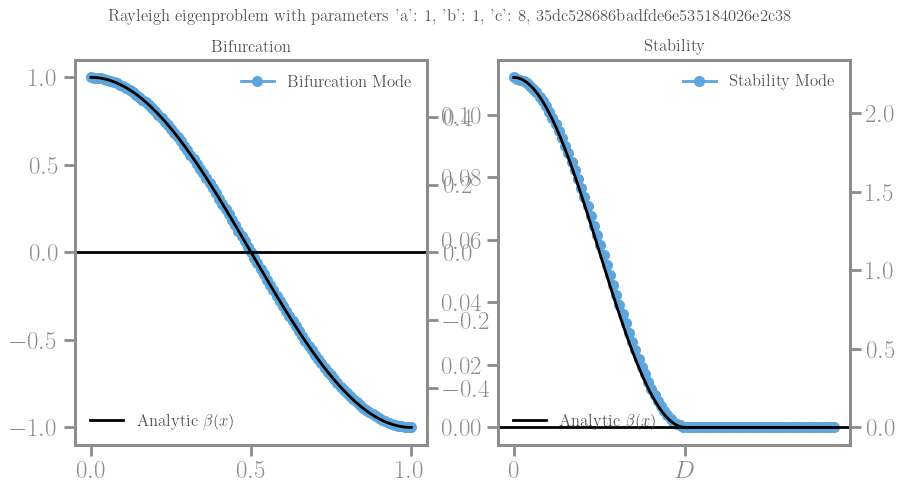

In [54]:
modes_data = np.load(os.path.join(experiment, 'mode_shapes_data.npz'), allow_pickle=True)
mode = pp.read_mode_data_from_npz(modes_data, time_step=0, num_modes=1, num_points=10)
_fig, _axes = pp.plot_fields_for_time_step(mode)
_fig.suptitle(f"Rayleigh eigenproblem with parameters {parameters}, {signature}")
eigenspace_v = solve_eigenspace_vector(parameters, idx=1)

v, β = eigenspace_v["v"], eigenspace_v["β"]
x_values = np.linspace(0, 1, 100)
v_function = sp.lambdify('x', v)
β_function = sp.lambdify('x', β)
v_values = [v_function(x) for x in x_values]
β_values = [β_function(x) for x in x_values]

__ax1 = _axes[0].twinx()
__ax1.plot(x_values, β_values, label=r'Analytic $\beta(x)$', c='k')

eigenspace_k = solve_eigenspace_cone(parameters, idx=0)

v, β = eigenspace_k["v"], eigenspace_k["β"]
D = eigenspace_k["D"]
x_values = np.linspace(0, 1, 100)
v_function = sp.lambdify('x', v)
β_function = sp.lambdify('x', β)
v_values = [v_function(x) for x in x_values]
β_values = [β_function(x) for x in x_values]

__ax2 = _axes[1].twinx()
__ax2.plot(x_values, β_values, label=r'Analytic $\beta(x)$', c='k')
__ax2.set_xticks([0, float(sp.N(D))], [0, "$D$"])

[_ax.legend() for _ax in _axes]
[ax.legend(loc='lower left') for ax in (__ax1, __ax2)]

_fig.savefig(f"../../test/output/rayleigh-benchmark/verification-{signature}.pdf", bbox_inches='tight')
_fig.savefig(f"../../test/output/rayleigh-benchmark/verification-{signature}.png", bbox_inches='tight')

## Sandbox

import

In [2]:
import pandas as pd
import os


In [3]:
!ls ../../test/output/one-dimensional-bar/MPI-1/10/de9ac8eaeda8acc5076c911fe1b284ad

history_data.json               simulation_results.xdmf
mode_shapes_data.npz            stability_data.json
parameters.yaml                 time_data.json
perturbation-profile-3.png      traction-bar.h5
perturbation-profile-4.png      traction-bar.xdmf
perturbation-profile-cone-3.png traction-bar_energies.pdf
perturbation-profile-cone-4.png traction-bar_it_load.pdf
signature.md5                   traction-bar_stress-load.pdf
simulation_results.h5


In [8]:
experiment = '../../test/output/one-dimensional-bar/MPI-1/10/de9ac8eaeda8acc5076c911fe1b284ad'

# df = pd.read_json(os.path.join(experiment, 'time_data.json'))
df = pd.read_json(os.path.join(experiment, 'stability_data.json'))


In [9]:
params, data, signature = pp.load_data(experiment)

In [10]:
params["stability"]["cone"]["cone_rtol"]

1e-06

In [11]:
df.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       2405, 2406, 2407, 2408, 2409, 2410, 2411, 2412, 2413, 2414],
      dtype='int64', length=2415)

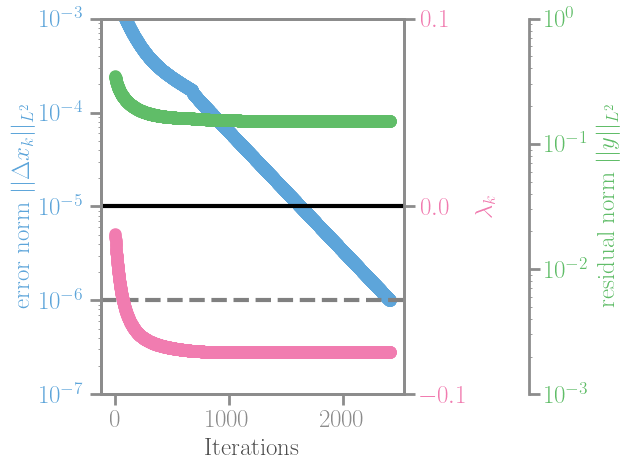

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# df = pd.read_json('your_file.json')  # Load your DataFrame

# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot 'error_x_L2' on the first y-axis
color = 'C0'
ax1.set_xlabel('Iterations')
ax1.set_ylabel(r'error norm $||\Delta x_k||_{L^2}$', color=color)
ax1.semilogy()
ax1.set_ylim(1e-7, 1e-3)
ax1.axhline(params["stability"]["cone"]["cone_rtol"], c='gray', linewidth=3, ls='--')
ax1.scatter(df.index, df['error_x_L2'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a twin axis sharing the xaxis
ax2 = ax1.twinx()
color = 'C3'
ax2.set_ylabel(r'$\lambda_k$', color=color)
ax2.set_ylim(-.1, .1)
ax2.axhline(0., c='k', linewidth=3)
ax2.set_yticks([-.1, 0, .1])
ax2.scatter(df.index, df['lambda_k'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add another twin axis for 'y_norm_L2'
ax3 = ax1.twinx()
color = 'C2'
ax3.spines['right'].set_position(('outward', 90))  # Offset the last axis
ax3.semilogy()
ax3.set_ylim(1e-3, 1e0)
ax3.set_ylabel(r'residual norm $||y||_{L^2}$', color=color)
ax3.scatter(df.index, df['y_norm_L2'], color=color)
ax3.tick_params(axis='y', labelcolor=color)
fig.tight_layout()

# Show the plot
fig.savefig('test_1d_stability-spa.pdf', bbox_inches='tight')
fig.savefig('test_1d_stability-spa.png')
# plt.show()